### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [91]:
#Import necessary librareis: Panda, Numpy, Seaborn, MatPlotLib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [93]:
#Load the coupons files from the data directory
data = pd.read_csv('data/coupons.csv')

In [95]:
#Display the first few rows 
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [97]:
#Identify how many rows are in the data file 
print(len(data))
#Identify how many empty values are in each column 
print(data.isnull().sum())
#Since the Car column has the most empty values, looking up what values are in the car column
print(data['car'].unique())

12684
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


3. Decide what to do about your missing data -- drop, replace, other...

In [99]:
#Since the age column can be used to filter, converting it to integer 
data['age'] = data['age'].replace({'below21' : 20, '50plus' : 51})
data['age'] = data['age'].astype(int)
#data.info()
# Also since the car column has most null values, and is not really helpful for analysis
# Choosing to ignore car column by removing it from the dataset
carless_df = data.drop(columns='car', axis=1)
carless_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int32 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [101]:
total = len(carless_df)
print(total, ' total rows in the survery dataset')

total_accepted = len(carless_df[carless_df['Y'] == 1])
print(total_accepted, ' who accepted coupon')

# % of number of users who accepted coupons to the total 
percent_accepted = (total_accepted / total) * 100
print(percent_accepted, '% choose to accept the coupon')

12684  total rows in the survery dataset
7210  who accepted coupon
56.84326710816777 % choose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

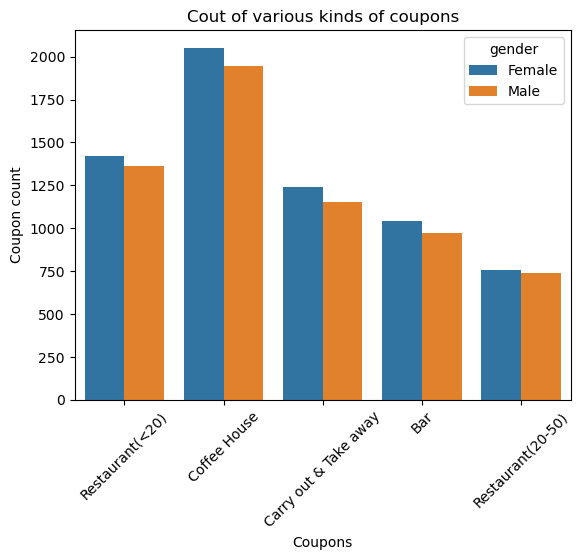

In [103]:
# Using the seaborn library to plot the various types of coupons and their count, segregated by gender 
sns.countplot(data=carless_df, x='coupon', hue='gender')
# Choose to tilt the X axis labels, so as to make it easier to read
plt.xticks(rotation=45)
# Provide appropriate labels
plt.xlabel('Coupons')
plt.ylabel('Coupon count')
plt.title('Cout of various kinds of coupons')
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

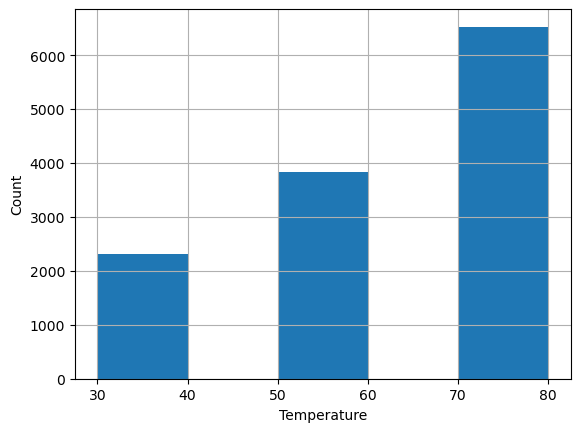

In [105]:
# Choose to create 5 bins as the temprature column seems to only have 3 groups 
carless_df['temperature'].hist(bins=5)
plt.xlabel('Temperature')
plt.ylabel('Count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [107]:
#Filter on Coupon column with value "Bar" in the Dataset without the Car column
bar_coupons_df = carless_df[carless_df['coupon'] == 'Bar']
print('Total number of bar coupons', len(bar_coupons_df))

Total number of bar coupons 2017


2. What proportion of bar coupons were accepted?


In [109]:
# number of bar coupons accepted
#accepted_bar_coupons_df = bar_coupons_df[bar_coupons_df['Y'] == 1]
#print('Number of bar coupons accepted', len(accepted_bar_coupons_df))

# % of Bar coupons accepted vs all Bar coupons
#percent_bar_coupons_accepted = (len(accepted_bar_coupons_df) / len(bar_coupons_df)) * 100
#print(percent_bar_coupons_accepted, ' % of bar coupons were accepted')

# Using the value_counts function to derive the %, as supposed to the usual mathematical method derived above
print(bar_coupons_df['Y'].value_counts(normalize = True)[1]*100, ' % of bar coupons were accepted')

41.00148735746158  % of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [111]:
# items that indicate 3 or fewer visits to the bar
three_or_fewer = ['never', 'less1', '1~3']
bar_le3_df = bar_coupons_df[bar_coupons_df['Bar'].isin(three_or_fewer)]
percent_bar_le3_df = bar_le3_df['Y'].value_counts(normalize = True)[1]*100
print(percent_bar_le3_df, '% of coupon acceptance for folks who visited the bar fewer than 3 times')

# values that indicate more than 3 visits to the bar
greater_than_3 = ['4~8', 'gt8']
bar_gt3_df = bar_coupons_df[bar_coupons_df['Bar'].isin(greater_than_3)]
percent_bar_gt3_df = bar_gt3_df['Y'].value_counts(normalize = True)[1]*100
print(percent_bar_gt3_df, '% of coupon acceptance for folks who visited the bar more than 3 times')

print('Frequent visitors to the bar (3 or more times) are',
      round(percent_bar_gt3_df / percent_bar_le3_df),
      'times more likely to accept coupons compared to infrequent visitors')

37.061769616026716 % of coupon acceptance for folks who visited the bar fewer than 3 times
76.88442211055276 % of coupon acceptance for folks who visited the bar more than 3 times
Frequent visitors to the bar (3 or more times) are 2 times more likely to accept coupons compared to infrequent visitors


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [113]:
one_or_greater = ['1~3', '4~8', 'gt8']
drivers_bar_gt_1_age_gt_25 = bar_coupons_df[bar_coupons_df['Bar'].isin(one_or_greater)]
drivers_bar_gt_1_age_gt_25 = drivers_bar_gt_1_age_gt_25[drivers_bar_gt_1_age_gt_25['age'] > 25]
print(drivers_bar_gt_1_age_gt_25['Y'].value_counts(normalize = True)[1]*100, ' % of frequent visitors above age 25 who accepted coupon')

one_or_fewer = ['never', 'less1']
drivers_bar_lt_1_age_lt_25 = bar_coupons_df[bar_coupons_df['Bar'].isin(one_or_fewer)]
drivers_bar_lt_1_age_lt_25 = drivers_bar_lt_1_age_lt_25[drivers_bar_lt_1_age_lt_25['age'] <25]
print(drivers_bar_lt_1_age_lt_25['Y'].value_counts(normalize = True)[1]*100, ' % of infrequent visitors below age 25 who accepted coupon')

print('Frequent visitors (more than once a month) above 25 are almost twice  as likely to accept bar coupons')

69.52380952380952  % of frequent visitors above age 25 who accepted coupon
39.44954128440367  % of infrequent visitors below age 25 who accepted coupon
Frequent visitors (more than once a month) above 25 are almost twice  as likely to accept bar coupons


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [115]:
more_than_once = ['1~3', '4~8', 'gt8']
#print(carless_df['passanger'].unique())
passanger_not_kid = ['Friend(s)', 'Partner']
#print(carless_df['occupation'].unique())
exclude_occupation = ['Farming Fishing & Forestry']

frequest_driver_criteria = bar_coupons_df[bar_coupons_df['Bar'].isin(more_than_once)]
passanger_notkid = bar_coupons_df[bar_coupons_df['passanger'].isin(passanger_not_kid)]
driver_not_farmfishfore = bar_coupons_df[~bar_coupons_df['occupation'].isin(exclude_occupation)]
print(frequest_driver_criteria['Y'].value_counts(normalize = True)[1]*100, ' % of folks who accepted bar coupon who are frequent visitors')
print(passanger_notkid['Y'].value_counts(normalize = True)[1]*100, ' % of folks who accepted bar coupon with an adult passanger')
print(driver_not_farmfishfore['Y'].value_counts(normalize = True)[1]*100, ' % of folks who accepted bar coupon not in the Farming / Fishing / Forestry industry')

print('In conclusion, folks who are frequent visitors are 2 times more likely to have accepted the coupon')

68.79194630872483  % of folks who accepted bar coupon who are frequent visitors
48.28150572831424  % of folks who accepted bar coupon with an adult passanger
40.986055776892435  % of folks who accepted bar coupon not in the Farming / Fishing / Forestry industry
In conclusion, folks who are frequent visitors are 2 times more likely to have accepted the coupon


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [117]:
more_than_once = ['1~3', '4~8', 'gt8']
passanger_not_kid = ['Friend(s)', 'Partner']
under_30 = ['20', '21', '26']
cheap_restaurants = ['4~8', 'gt8']
income_under_50k = ['$37500 - $49999']

#print(carless_df['maritalStatus'].unique())

# The question can be interprited differently, I choose to generate two results
# Option 1 Create 3 individual criterias
criteria_1 = carless_df[
    (carless_df['Bar'].isin(more_than_once)) &
    (carless_df['passanger'].isin(passanger_not_kid)) &
    (~carless_df['maritalStatus'].isin(['Widowed']))
]

criteria_2 = carless_df[
    (carless_df['Bar'].isin(more_than_once)) &
    (carless_df['age'] < 30)
]

#print(carless_df['income'].unique())
#print(carless_df['RestaurantLessThan20'].unique())
criteria_3 = carless_df[
    (carless_df['RestaurantLessThan20'].isin(cheap_restaurants)) &
    (carless_df['income'].isin(income_under_50k))
]

# Option 2 Create 1 criteria with all three options combined
giant_criteria = carless_df[
    ((carless_df['Bar'].isin(more_than_once)) &
    (carless_df['passanger'].isin(passanger_not_kid)) &
    (~carless_df['maritalStatus'].isin(['Widowed']))) |
    ((carless_df['Bar'].isin(more_than_once)) &
    (carless_df['age'] < 30)) |
    ((carless_df['RestaurantLessThan20'].isin(cheap_restaurants)) &
    (carless_df['income'].isin(income_under_50k)))
]

print(criteria_1['Y'].value_counts(normalize = True)[1]*100,
      '% go to bars more than once a month, had passengers that were not a kid, and were not widowed')
print(criteria_2['Y'].value_counts(normalize = True)[1]*100,
      '% go to bars more than once a month, had passengers that were not a kid, and were not widowed')
print(criteria_3['Y'].value_counts(normalize = True)[1]*100,
      '% go to bars more than once a month, had passengers that were not a kid, and were not widowed')

print(giant_criteria['Y'].value_counts(normalize = True)[1]*100, '% of acceptance based on criteria provided')

print('Similar results as prior, frequent visitors (more than once a month) seem to be 70% likely to accept coupon')

69.02404526166902 % go to bars more than once a month, had passengers that were not a kid, and were not widowed
62.808098591549296 % go to bars more than once a month, had passengers that were not a kid, and were not widowed
62.91793313069909 % go to bars more than once a month, had passengers that were not a kid, and were not widowed
63.35158150851582 % of acceptance based on criteria provided
Similar results as prior, frequent visitors (more than once a month) seem to be 70% likely to accept coupon


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [119]:
print('There is more than 2 in 3 (almost 70%) chance of a person accepting a coupon \
if they frequent a bar more than once a month, \
especially if they are in company of an adult')

There is more than 2 in 3 (almost 70%) chance of a person accepting a coupon if they frequent a bar more than once a month, especially if they are in company of an adult


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

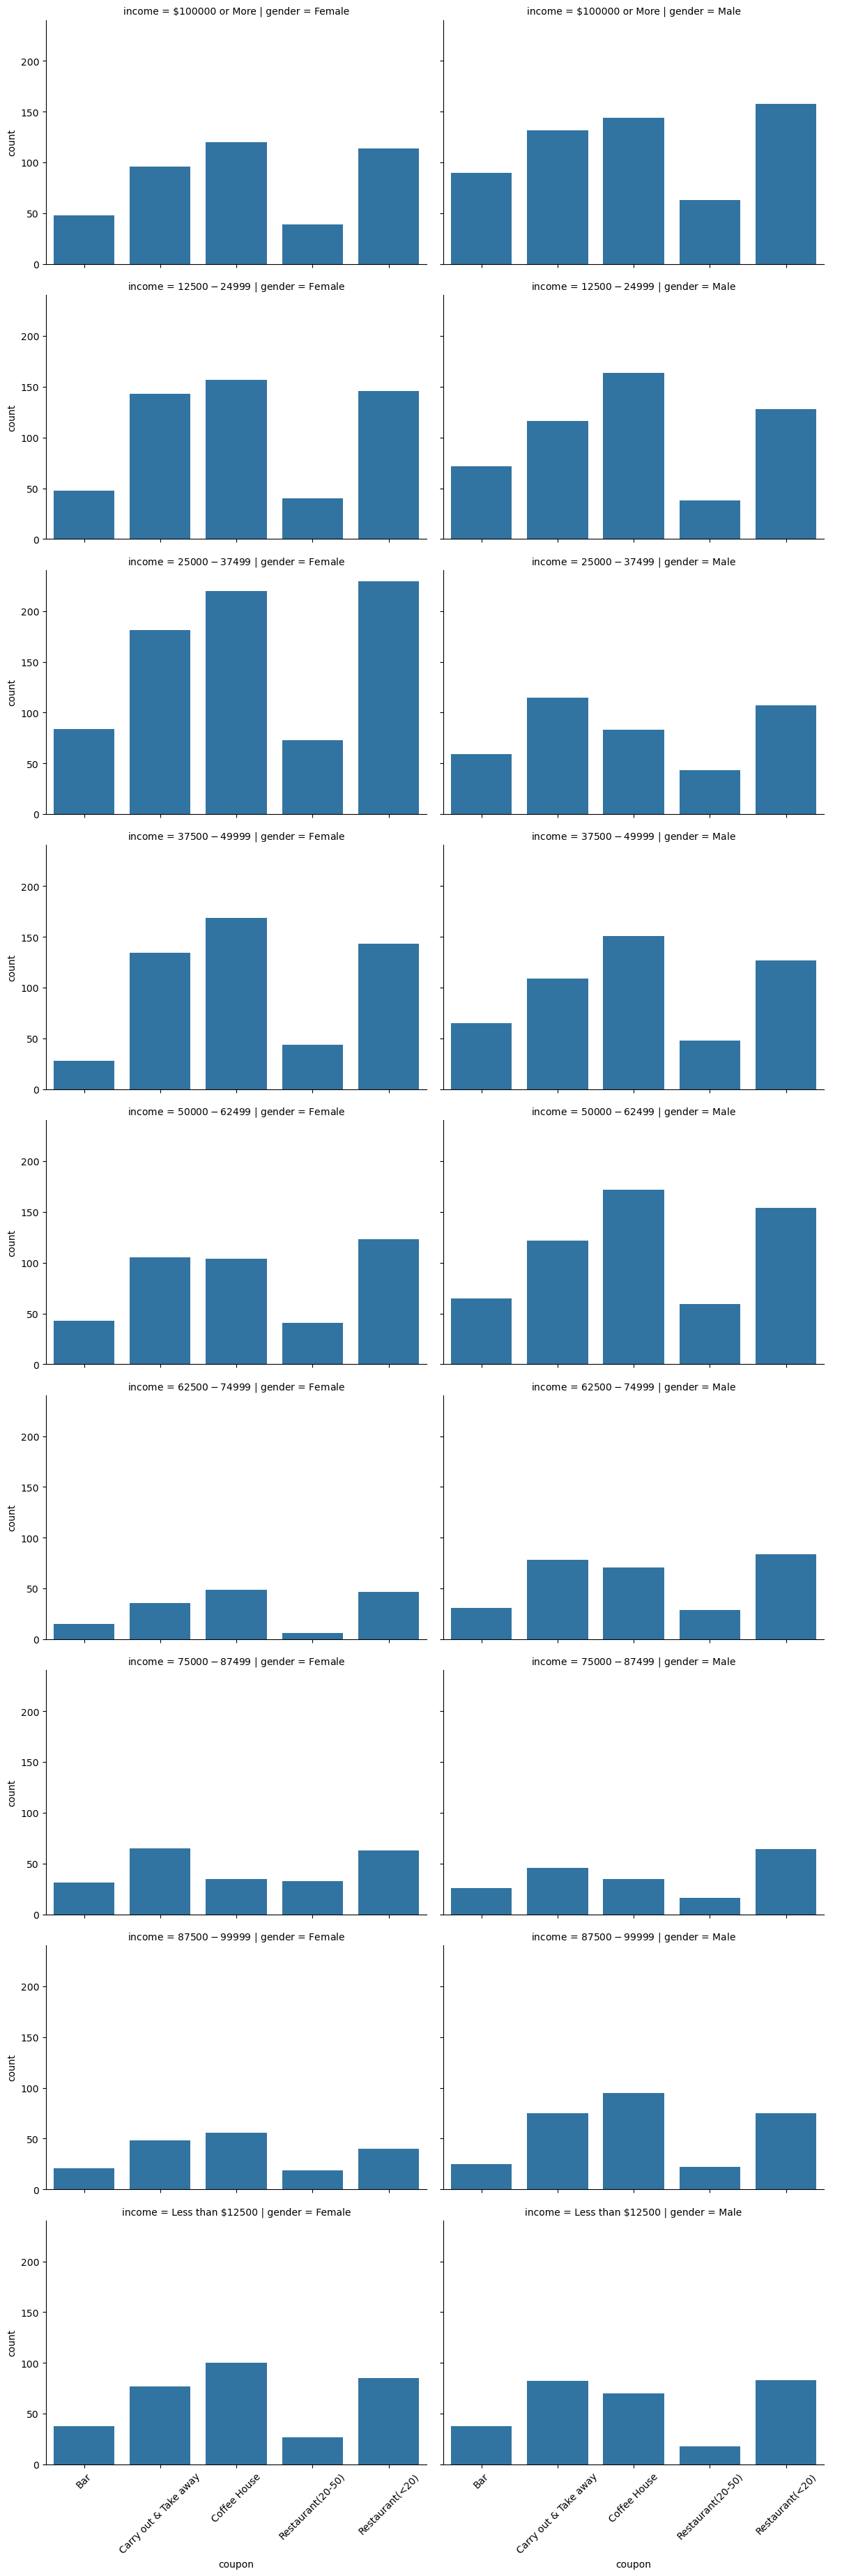

In [123]:
accepted_coupons = carless_df[carless_df['Y'] == 1].groupby(['coupon', 'gender', 'income']).size().reset_index(name='count')
#print(accepted_coupons)
plot = sns.catplot(data=accepted_coupons, x='coupon', y='count', col='gender', row='income', kind='bar', height=4, aspect=1.5)
plot.tick_params(axis='x', rotation=45)